<span style="color:grey">Author:</span>
<span style="color:yellow">Guillem Borràs</span>

<span style="color:grey">Github</span>: @guiillem_10

<span style="color:grey">Linkedin</span>: https://www.linkedin.com/in/guillem-borras/


---

# 📊 Quantitative Analysis of Sustainable (ESG) ETFs in Europe and the U.S.

This notebook is part of a broader quantitative finance project.  
In this section, we focus on **Exchange-Traded Funds (ETFs) with a strong sustainability (ESG) profile**, selected from **European and U.S. markets**, with the goal of evaluating their historical performance and risk profile compared to traditional market benchmarks.

---

## 🎯 Specific Objectives

1. **Download and clean historical price data** for ESG ETFs and benchmarks (S&P 500, MSCI Europe, etc.) via `yfinance`.
2. **Compute key performance and risk metrics**:  
   - Annualized return and volatility  
   - Sharpe, Sortino, and Calmar ratios  
   - Maximum drawdown, hit ratio, historical VaR and CVaR  
   - Beta and correlation with the benchmark  
3. **Statistical analysis of returns**:
   - Fit Normal and Student-t distributions  
   - Assess skewness and kurtosis  
4. **Conditional volatility modeling** using **GARCH(1,1)** models with both normal and t-Student innovations.
5. **Visualization and automated commentary** to synthesize key findings and communicate results clearly and professionally.

---

## 🔍 Added Value

This analysis aims to answer questions such as:
- Have sustainable ETFs delivered returns and risk profiles comparable to their benchmarks?
- Do they exhibit lower volatility or smaller drawdowns during crises?
- Do their returns follow a normal distribution, or do they exhibit fat tails?
- How does their volatility evolve over time, and how persistent is it?

The notebook combines **advanced quantitative techniques** with **intuitive visualizations** and **automated commentary**, demonstrating a professional approach to financial asset analysis.


---

#### ETF Selection and Analysis Scope

This analysis focuses on **two ETFs with a strong ESG (Environmental, Social, and Governance) profile**, one from the **United States** and one from **Europe**, to provide representation from both regions.

- **U.S. ESG ETF:** *iShares MSCI USA ESG* (**ESGU**) – a broad-based U.S. fund that tracks the MSCI USA ESG Leaders Index.  
- **European ESG ETF:** *Amundi STOXX Europe 600 ESG UCITS ETF* (**AME6.DE**) – a sustainable European fund that tracks the MSCI Europe SRI Index.  

**Benchmarks:**  
- For the U.S. ETF (**ESGU**), the benchmark is the **S&P 500** index (**^GSPC**).  
- For the European ETF (**AME6.DE**), the benchmark is the **Euro Stoxx 50** index (**^STOXX50E**).  
- Additionally, we include the **MSCI World Index** (**URTH** ETF) for a global perspective.

**Selection rationale:**  
These ESG ETFs apply investment policies that exclude companies with poor environmental, social, or governance practices, while closely replicating the performance of broad market indices. In many cases, **the returns of ESG ETFs are comparable to those of conventional broad market ETFs**, as they invest in well-managed companies with strong ESG profiles that can deliver competitive long-term returns.  
By comparing them with their benchmarks, we can assess whether they have achieved similar or superior performance. Research also suggests that excluding low-ESG-scoring companies can reduce idiosyncratic risk, potentially resulting in slightly lower volatility or smaller drawdowns during market stress periods.

**Analysis period:**  
We use a historical range of approximately **2015–present** (about 8–10 years) with daily price data to capture multiple market regimes, including bull markets, bear markets (such as the COVID-19 crash in 2020), and recovery phases. This allows us to evaluate the resilience and risk-adjusted performance of ESG ETFs across varying conditions.

**Benchmark:**

We use de S&P500 as the main reference for the US ETF's, whereas the EuroStoxx 50 is the benchmark which is used to track the evolution of the European funds.

In [1]:
%load_ext autoreload
%autoreload 2
from utils import download_analyze_with_metrics, plot_prices, plot_returns, fit_models_from_panel, plot_hist_stdres_garch, plot_hist_with_pdf_normal_t, plot_hist_with_spline, plot_hist_with_kde

The historical price and return data used in this analysis will be obtained through the custom-built function **`download_analyze_with_metrics`**, a highly versatile and robust tool specifically designed for quantitative financial research.  

This function offers a **full data pipeline in a single call**:

1. **Automated data download** – Retrieves historical price data for any list of tickers directly from Yahoo Finance, including optional benchmark series, using the `yfinance` API.
2. **Advanced data cleaning** –  
   - Handles missing values intelligently (forward/backward fill within a limit).  
   - Removes non-trading anomalies and constant series.  
   - Ensures positive prices and proper date alignment across assets.  
3. **Return computation** – Computes both simple and log returns, with optional *winsorization* to control the impact of extreme outliers.  
4. **Risk and performance metrics** – Generates a comprehensive **per-asset summary table** including:  
   - Annualized log-return $r_t = log(P_{t+1}/P_t)$ & volatility  
   - Sharpe, Sortino, and Calmar ratios  
   - Maximum drawdown & time in drawdown  
   - Historical and parametric VaR/CVaR  
   - Skewness & excess kurtosis  
   - Beta, alpha, and correlation with the benchmark  
5. **Additional analytics** – Returns a dictionary of extras, such as:  
   - Individual drawdown series  
   - Correlation matrix across assets  
   - Rolling volatility and Sharpe ratio windows  
6. **Automated commentary (optional)** – Uses `generate_financial_commentary` to produce a ready-to-use, plain-language narrative summarizing the key statistics for all assets analyzed.

**Why it stands out:**  
`download_analyze_with_metrics` is essentially **an end-to-end market analysis engine**.  
It encapsulates multiple steps that would normally require dozens of lines of code — data ingestion, cleaning, transformation, metric computation, and high-level interpretation — into a single, reproducible call.  
Its flexibility in handling different cleaning parameters, return types, and benchmark integration makes it **one of the most powerful and time-efficient functions in this project**, and a cornerstone for building professional-grade financial analytics workflows.


In [45]:
start_date = '2017-01-04'
rf_annual = 0.02
ret_method = 'log'
winsor = None

The start date is a bit strange. It is intentionally used to syncronize both US and EU's ETF time series.

In [35]:
tickers_us = ['ESGU', 'EFIV']
tickers_eu   = ["UIMR.DE"]
benchmark_us = '^GSPC'
benchmark_eu = '^STOXX50E'

In [41]:
panel_us, summary_us, extras_us, commentary_us = download_analyze_with_metrics(
    tickers=tickers_us,
    start_date=start_date,
    benchmark=benchmark_us,
    rf_annual=rf_annual,
    periods_per_year=252,
    auto_adjust=True,
    winsorize_returns=winsor,
    return_method=ret_method,
    make_commentary=True,
    benchmark_name_for_comment="S&P 500",
    return_units_for_comment="daily"
)

<string>:15: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
<string>:16: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.


In [42]:
panel_eu, summary_eu, extras_eu, commentary_eu = download_analyze_with_metrics(
    tickers=tickers_eu,
    start_date=start_date,
    benchmark=benchmark_eu,                 # no separate benchmark here; ^STOXX50E is the European leg
    rf_annual=rf_annual,
    periods_per_year=252,
    auto_adjust=True,
    winsorize_returns=winsor,
    return_method=ret_method,
    make_commentary=True,
    benchmark_name_for_comment="Euro Stoxx 50",
    return_units_for_comment="daily"
)

<string>:15: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
<string>:16: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.


Some quick sanity prints to check time series downloads have been succesfull:

In [52]:
print("US tickers:", tickers_us, "| Benchmark:", benchmark_us)
print("US summary head:\n", summary_us.head(), "\n")
print("---------------NEW!-------------")
print("US (AUTO) commentary:\n", commentary_us, "\n")

US tickers: ['ESGU', 'EFIV'] | Benchmark: ^GSPC
US summary head:
   ticker      start        end  n_obs      mean  ann_return   ann_vol  \
0   ESGU 2017-01-04 2025-08-12   2163  0.000543    0.136756  0.191555   

     sharpe   sortino  max_drawdown  ...   omega_0      skew  kurt_excess  \
0  0.609518  0.701971     -0.360878  ...  1.152793 -0.629145    15.889384   

       beta  alpha_annual  corr_bench  hit_ratio  avg_gain  avg_loss  \
0  0.992813      0.016524     0.98131    0.52196  0.007844 -0.008546   

   time_in_drawdown_pct  
0             84.512252  

[1 rows x 25 columns] 

---------------NEW!-------------
US (AUTO) commentary:
 Analysis of the daily returns for the assets in relation to S&P 500:
- The assets show an average beta of 0.99 and an average correlation of 0.98 with S&P 500, indicating strong market comovement.
- The average annualized return across assets is 13.68%, with an average annualized volatility of 19.16%.
- The average Sharpe ratio is 0.61, suggesting mode

In [53]:
print("European ESG ETF ticker:", tickers_eu)
print("Summary EU ESG ETF:\n", summary_eu.head(), "\n")
print("---------------NEW!-------------")
print("EU (AUTO) commentary:\n", commentary_eu, "\n")

European ESG ETF ticker: ['UIMR.DE']
Summary EU ESG ETF:
     ticker      start        end  n_obs      mean  ann_return   ann_vol  \
0  UIMR.DE 2017-01-03 2025-08-12   2188  0.000298    0.075147  0.171279   

    sharpe   sortino  max_drawdown  ...   omega_0      skew  kurt_excess  \
0  0.32197  0.391492     -0.387385  ...  1.085905 -0.891678    17.342798   

       beta  alpha_annual  corr_bench  hit_ratio  avg_gain  avg_loss  \
0  0.898261      0.023758    0.966372   0.531536  0.007092 -0.007603   

   time_in_drawdown_pct  
0             92.595978  

[1 rows x 25 columns] 

---------------NEW!-------------
EU (AUTO) commentary:
 Analysis of the daily returns for the assets in relation to Euro Stoxx 50:
- The assets show an average beta of 0.90 and an average correlation of 0.97 with Euro Stoxx 50, indicating strong market comovement.
- The average annualized return across assets is 7.51%, with an average annualized volatility of 17.13%.
- The average Sharpe ratio is 0.32, suggesting

---

#### Deep-Dive Interpretation of the Preliminary Statistics

1) Market coupling and systematic risk
- **U.S. ESG (vs S&P 500):** An average **β ≈ 0.99** with **ρ ≈ 0.98** indicates the US ESG sleeve behaves almost like a broad-market proxy. In practical terms, portfolio P&L will be dominated by **systematic risk**; idiosyncratic/ESG-specific effects are second order at the daily horizon.
- **Europe ESG (vs Euro Stoxx 50):** **β ≈ 0.90** with **ρ ≈ 0.97** still implies tight market comovement, but the lower beta suggests **slightly lower sensitivity** to large European index moves—consistent with ESG filters that can underweight higher-volatility sectors.  
**Risk note:** These are **unconditional, in-sample** betas. For risk budgeting and hedging, we should validate **stability** via rolling betas and (later) a conditional volatility model (e.g., GARCH).

2) Return–risk trade-off (levels vs efficiency)
- **U.S. ESG:** **Ann. return ~13.7%** with **ann. vol ~19.2%** yields **Sharpe ~0.61** (given the specified risk-free rate). That is **modest** but respectable for long-only equities over a long horizon.
- **Europe ESG:** **Ann. return ~7.5%** with **ann. vol ~17.1%** yields **Sharpe ~0.32**, markedly lower than the U.S. sleeve. This points to a **weaker compensation per unit of risk**, not just lower absolute returns.  
**Interpretation:** From a hedge fund’s perspective, the US ESG sleeve looks more efficient; the European sleeve would require either **tactical timing**, **leverage with risk controls**, or **overlay hedges** to justify capital relative to alternative risk uses.

3) Tail risk and distributional shape
- Both sleeves show **left-tail bias** and **extreme leptokurtosis** (excess kurtosis ≈ **15.9** US, **17.3** Europe). These are **far** from Normal and imply **fat tails**—higher likelihood of large losses than Gaussian assumptions would suggest.
- At **95%** confidence, **historical 1-day VaR** is about **1.8% (US)** and **1.6% (EU)**; corresponding **CVaR/ES** is **~3.0% (US)** and **~2.6% (EU)**. ES (CVaR) quantifies **expected loss given that we are already in the worst 5%**—more informative for capital at risk than VaR alone.  
**Risk note:** With kurtosis this high, **parametric Normal VaR** will **underestimate** tail risk. We should prefer **historical** or **t-Student/mixture** parametric approaches and validate with **out-of-sample** checks.

4) Benchmark-relative perspective
- The US ESG sleeve’s near-unit beta and high correlation imply it **tracks the market closely**; its edge (if any) must come from **sector/quality tilts** or **exclusions** that play out over medium horizons (e.g., downside mitigation in stress). The European sleeve’s lower beta suggests **milder drawdown sensitivity**, but given the observed Sharpe, this **did not translate** into superior risk-adjusted returns in-sample.
- Before attributing structural conclusions, we should **harmonize sample windows**, confirm **currency/exchange effects**, and control for **sector exposures** to isolate a true ESG effect from composition differences.

5) Practical implications for portfolio construction
- **Position sizing & leverage:** Given fat tails, size exposures assuming **ES-based** constraints (not Normal VaR). If leverage is used, add **hard loss limits** and **volatility targeting**.
- **Hedges:** For the US sleeve, index futures/swaps are efficient hedges (β≈1). For Europe, use **scaled hedges** (β≈0.9) or sector-aware hedging to avoid over/under-hedge.
- **Risk monitoring:** Implement **rolling volatility/Sharpe** and **drawdown clocks**; in fat-tailed regimes, monitoring **time in drawdown** is as informative as peak drawdown.

6) Methodology and data quality checks
- Confirm **data alignment** (trading calendars, listing changes, corporate actions already handled by adjusted prices).  
- Re-run key stats **by subperiods** (e.g., pre-2020, 2020 crisis, post-2020) to assess **regime dependence**.  
- If outliers cluster in specific episodes, consider **winsorization** for descriptive plots (not for risk backtesting) to improve readability, while keeping **unwinsorized** series for risk metrics.

---

**Bottom line:**  
Both ESG sleeves behave as **equity beta exposures** with **material tail risk**. The U.S. sleeve delivered **meaningfully stronger risk-adjusted returns** in-sample; the European sleeve shows **lower beta** but **weaker Sharpe**. Given the **non-normal** nature of returns, subsequent analysis should (i) visualize **cumulative returns**, **rolling risk/Sharpe**, and **drawdowns**, and (ii) proceed to **distributional fits (Normal vs t)** and **conditional volatility models (GARCH / GARCH-t)** to capture clustering and fat tails before any allocation or overlay decision.


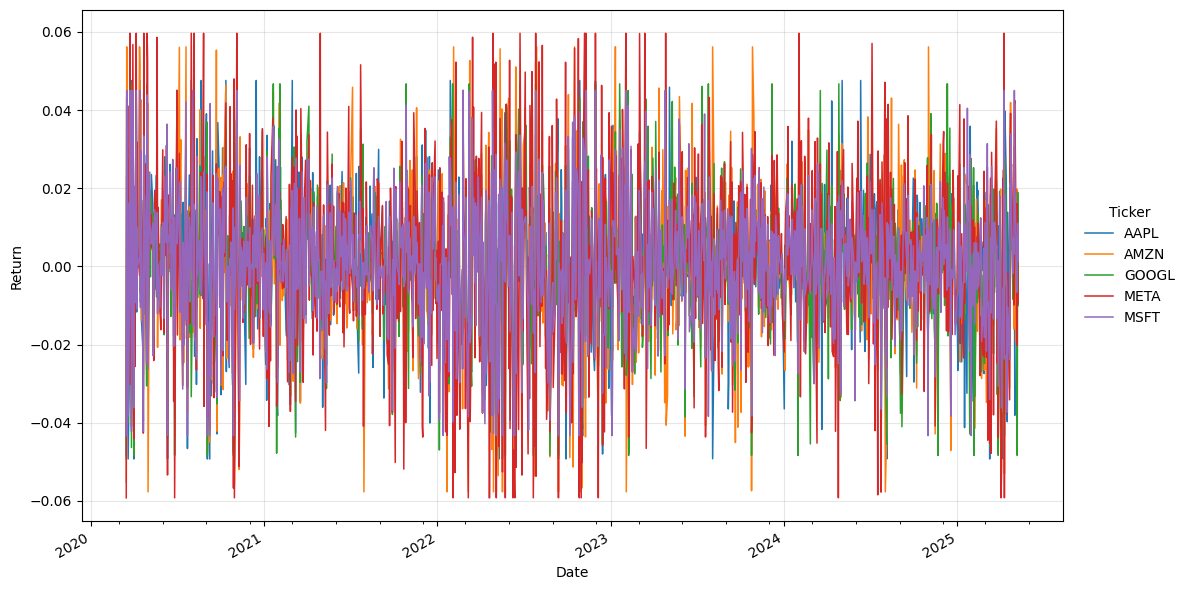

In [17]:
plot_returns(panel[['date','ticker','return']], 
             kind="line",
             rolling_vol_window=False,
             start_date=start_date, 
             end_date=end_date)

We can also take a look to the histogram of these returns. We expect it to be Gaussian-shaped, as the academy usually assumes. We can also expect it to have a heavier left tail than the right one, since it is one of the stylized facts of the financial series

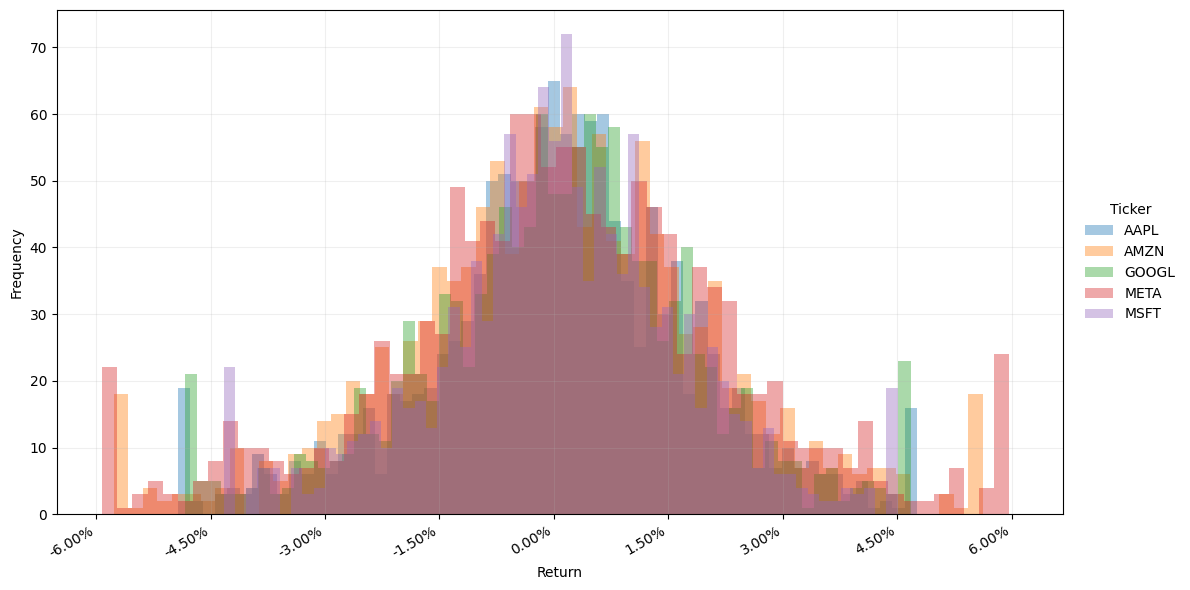

In [18]:
plot_returns(panel[['date','ticker','return']], 
             kind="hist",
             rolling_vol_window=False,
             start_date=start_date, 
             end_date=end_date)

Some additional graphics...

c:\Users\guilb\Desktop\github_portfolio\utils.py:613: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mret = rets.resample("M").apply(lambda x: (1 + x).prod() - 1)


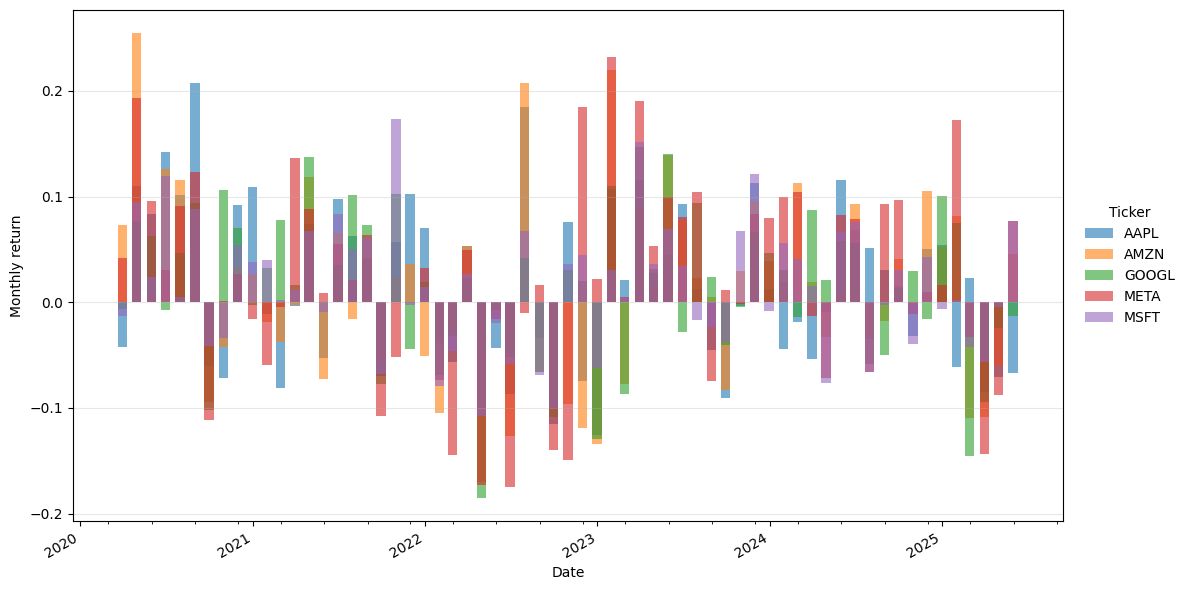

In [19]:
plot_returns(panel[['date','ticker','return']], 
             kind="bar",
             rolling_vol_window=False,
             start_date=start_date, 
             end_date=end_date)

Finally, we demonstrate the power of the generate_financial_commentary function, which provides an easy and quick way to analyse data and draw conclusions in the preliminary exploratory analysis.

In [20]:
print(auto_comment)

Analysis of the daily returns for the assets in relation to S&P 500:
- The assets show an average beta of 1.06 and an average correlation of 0.67 with S&P 500, indicating moderate market comovement.
- The average annualized return across assets is 21.80%, with an average annualized volatility of 27.22%.
- The average Sharpe ratio is 0.73, suggesting modest risk-adjusted performance.
- The return distribution shows slight left-tail bias on average and fat tails (avg. excess kurtosis = 1.18), implying a departure from normality and potential tail risk.
- At 95% confidence, the average historical VaR is 2.85% and the Conditional VaR is 4.00%, highlighting the scale of potential losses under adverse conditions.
- Overall, the assets exhibit characteristics typical of equities: high volatility relative to mean returns, significant market sensitivity, and non-negligible tail risk.


## 1.2. Fitting time series

In [25]:
# Fit all four models for a single ticker
res_META = fit_models_from_panel(panel, ticker="META")
display(res_META["comparison"])    # BIC ranking (lower is better)
res_META


,model,aic,bic,loglik
0,t,-15904.318352,-15886.133891,7955.159176
1,normal,-15748.319842,-15736.196869,7876.159921
2,garch_t,12962.435941,12992.743375,-6476.217971
3,garch_normal,13074.484467,13098.730414,-6533.242233


{'normal': {'model': 'normal',
  'mu': 0.0009968785612193846,
  'sigma': 0.02017055183292864,
  'loglik': 7876.159921239944,
  'aic': -15748.319842479888,
  'bic': -15736.196868746145},
 't': {'model': 't',
  'nu': 5.058183878307066,
  'mu': 0.0012265163359941474,
  'sigma': 0.015947130310539598,
  'loglik': 7955.159175766137,
  'aic': -15904.318351532274,
  'bic': -15886.13389093166},
 'garch_normal': {'model': 'garch(1,1)-normal',
  'mu': 0.0011951843465595237,
  'omega': 0.040949585553961325,
  'alpha1': 0.04893036663354389,
  'beta1': 0.9411945408863256,
  'loglik': -6533.242233386965,
  'aic': 13074.48446677393,
  'bic': 13098.730414241416,
  'n_obs': 3170,
  'converged': True,
  'uncond_var': 4.146754639144411},
 'garch_t': {'model': 'garch(1,1)-t',
  'mu': 0.001407048023637736,
  'omega': 0.01938006668403931,
  'alpha1': 0.06041128976325477,
  'beta1': 0.9384627308641272,
  'nu': 6.4329925820661105,
  'loglik': -6476.217970531219,
  'aic': 12962.435941062438,
  'bic': 12992.7433

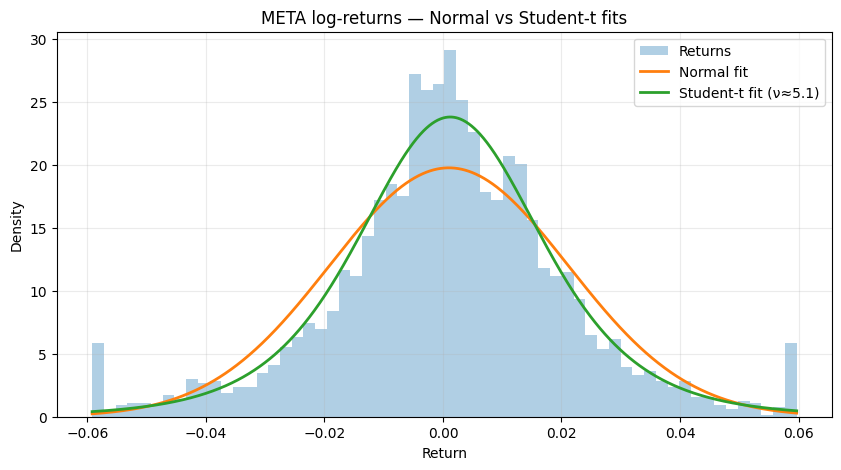

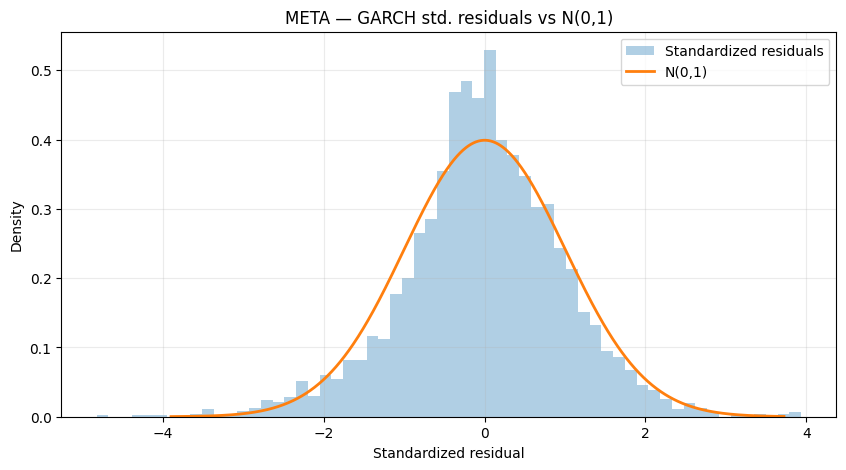

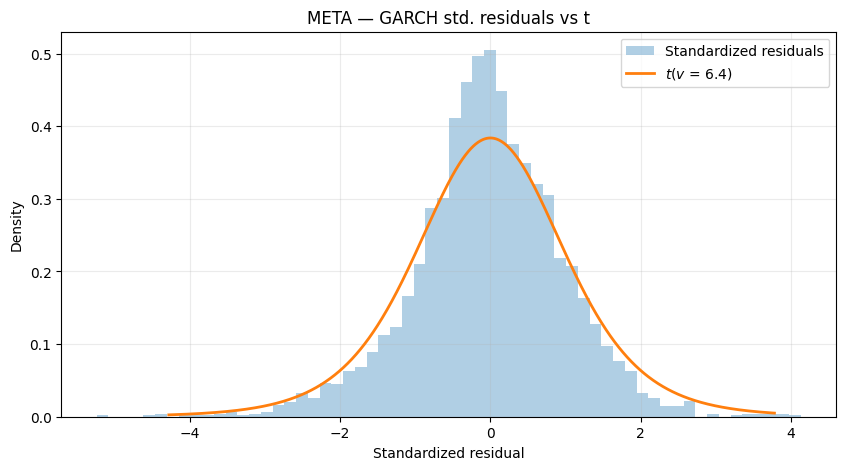

In [26]:
# Take panel from download_analyze_with_metrics
ser = (panel.loc[panel["ticker"]=="META"]
             .sort_values("date")["return"]
             .astype(float).dropna())

# Normal vs Student-t overlaid on histogram of returns (i.i.d. view)
plot_hist_with_pdf_normal_t(
    returns=ser,
    fit_normal_dict=res_META["normal"],
    fit_t_dict=res_META["t"],
    bins=60,
    title="META log-returns — Normal vs Student-t fits"
)

# GARCH standardized residuals vs assumed innovations
plot_hist_stdres_garch(
    returns=ser,
    dist="normal",
    title="META — GARCH std. residuals vs N(0,1)"
)

plot_hist_stdres_garch(
    returns=ser,
    dist="t",
    title="META — GARCH std. residuals vs t"
)


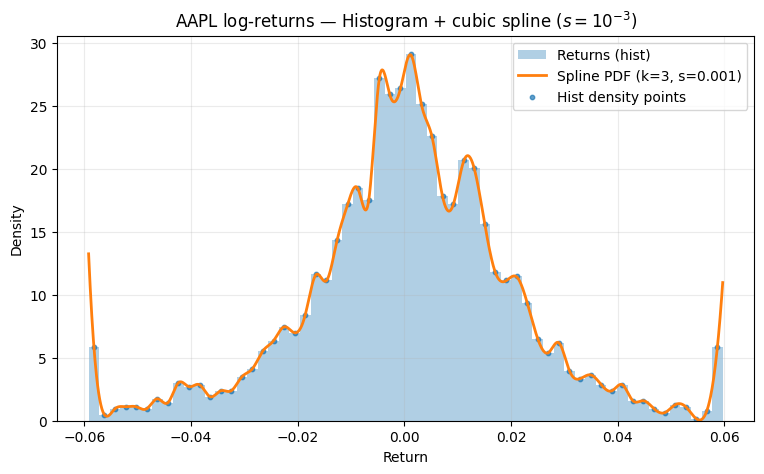

In [27]:
# Spline
plot_hist_with_spline(ser, bins=60, k=3, s=1e-3,
                      title=r"AAPL log-returns — Histogram + cubic spline ($s=10^{-3}$)")


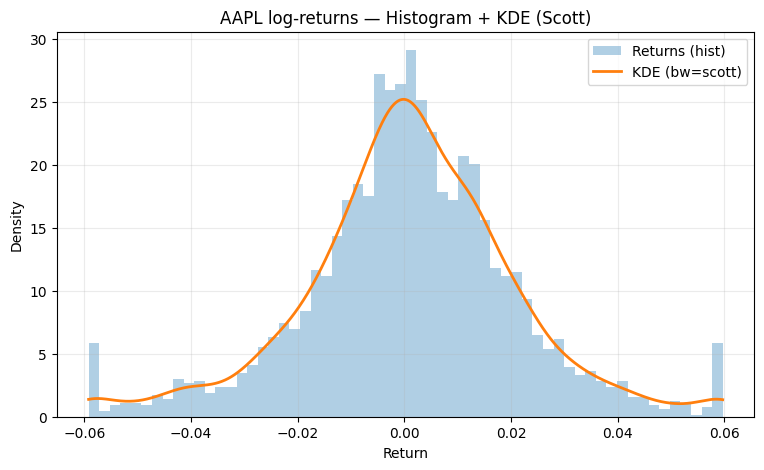

In [28]:
plot_hist_with_kde(ser, bins=60, bw_method="scott",
                   title="AAPL log-returns — Histogram + KDE (Scott)")